# <div style = 'background-color:#50474E'> <center><font color='#8FAD88'>Machine Learning aplicado a la detección de fraudes bancarios</div>
---

#### En este notebook aplico técnicas de Machine Learning orientadas a la detección de fraude bancario, con el objetivo de identificar transacciones potencialmente fraudulentas a partir de patrones en los datos.
#### El proceso incluye la preparación y normalización del dataset, análisis exploratorio para evaluar distribuciones y desequilibrio de clases, y la implementación comparativa de modelos utilizados.
#### Finalmente, se evalúa el rendimiento de cada modelo mediante métricas como Precision, Recall, F1-Score y AUC, priorizando la capacidad de detección de fraudes minimizando falsos negativos.

#### Indice

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Preparación y limpieza de los datos](#0)<br>
2.  [Analisis exploratorio de los datos](#1)<br>
3.  [Modelado y evaluación](#2) <br>
4.  [Concluciones](#3) <br>

</div>

## <div style = 'background-color:#50474E'> <center><font color='white'>① Preparación y limpieza de los datos </font></div> <a id="0"></a>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Borrar warnings

In [2]:
df = pd.read_csv("Fraude_bancario.csv")

In [3]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Este conjunto de datos contiene únicamente variables de entrada numéricas que son el resultado de una transformación PCA (Análisis de Componentes Principales).
Debido a cuestiones de confidencialidad, no se proporcionan las variables originales ni información adicional sobre el contexto de los datos.
Las características V1, V2, … V28 corresponden a las componentes principales obtenidas mediante PCA.
Las únicas variables que no fueron transformadas son:
Time: representa los segundos transcurridos entre cada transacción y la primera transacción del dataset.
Amount: indica el monto de la transacción. Esta variable puede ser útil, por ejemplo, para enfoques de aprendizaje dependiente del ejemplo o sensible al costo.
La variable objetivo Class toma el valor 1 en caso de fraude y 0 en caso contrario.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## <div style = 'background-color:#50474E'> <center><font color='white'>② Analisis exploratorio de los datos (EDA) </font></div><a id="1"></a>

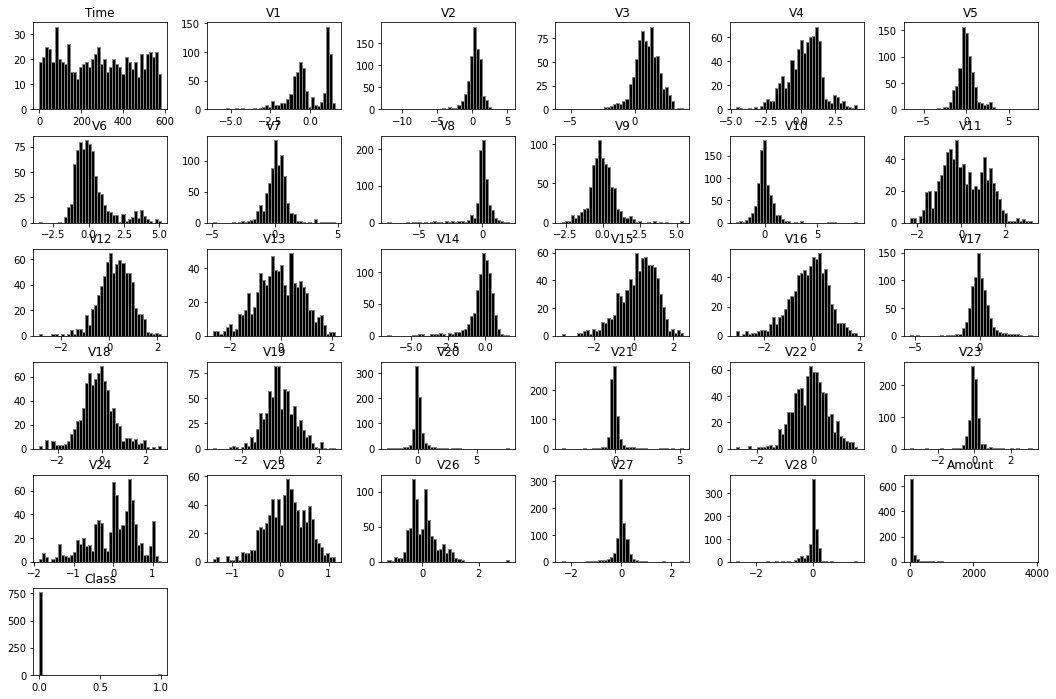

In [7]:
_ = df.hist(figsize=(18, 12), bins=40, color='black', edgecolor='grey', grid=False)

# _ = para evitar imprimir el array

In [8]:
# Contar cantidad de valores de la variable objetivo
cuentas = df['Class'].value_counts()

print()
print(f"Transacciones normales: {cuentas.get(0,0)}")
print(f"Transacciones fraudulentas: {cuentas.get(1,0)}")
print("Se evidencia un alto desbalance de los valores")



Transacciones normales: 763
Transacciones fraudulentas: 9
Se evidencia un alto desbalance de los valores


c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


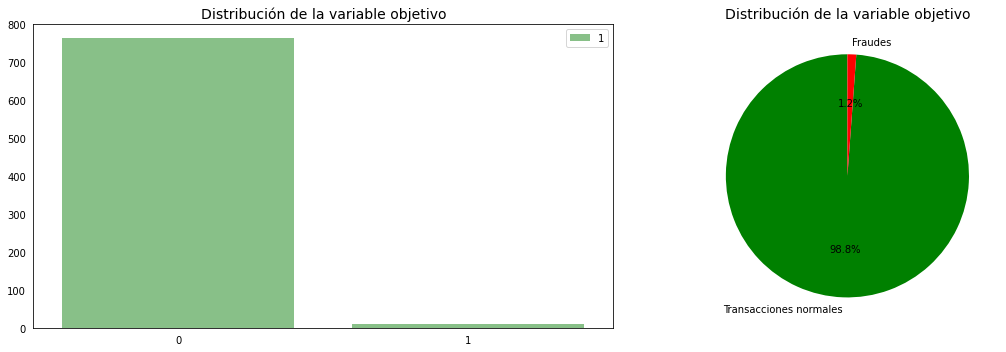

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figura con dos subplots uno al lado de otro.
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x='Class', data=df, palette="Accent", hue=1, ax=ax[0]) # Barra
ax[0].set_title('Distribución de la variable objetivo', fontsize=14)
ax[0].tick_params(left=False, bottom=False)  # Quitar ticks
ax[0].grid(False)
ax[0].set_xlabel('')  # Quitar nombres de los ejes
ax[0].set_ylabel('')  # Quitar nombres de los ejes

cuentas = df['Class'].value_counts() # Grafico torta
labels = ['Transacciones normales', 'Fraudes']
sizes = [cuentas.get(0,0), cuentas.get(1,0)]

ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green','red'], startangle=90)
ax[1].set_title('Distribución de la variable objetivo', fontsize=14)

plt.tight_layout()
plt.show()


En este tipo de datasets, los outliers son información, no ruido. Porque esas son las transacciones anómalas que quiero detectar.

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

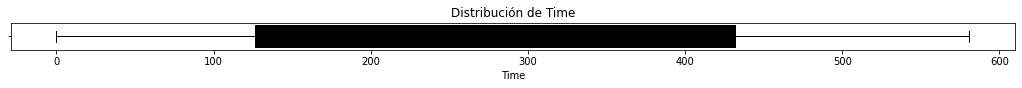

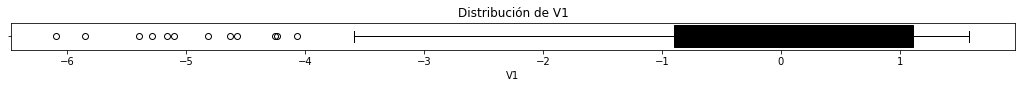

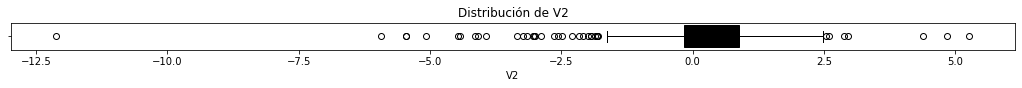

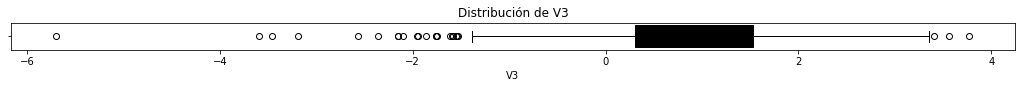

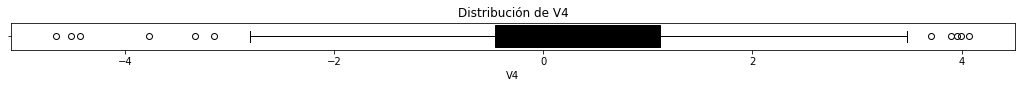

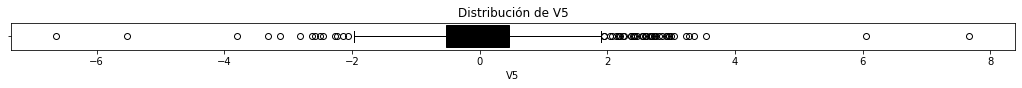

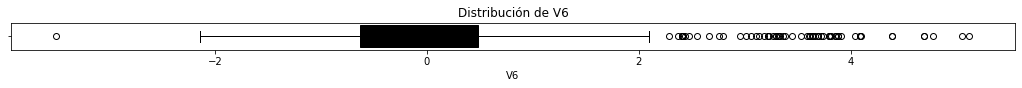

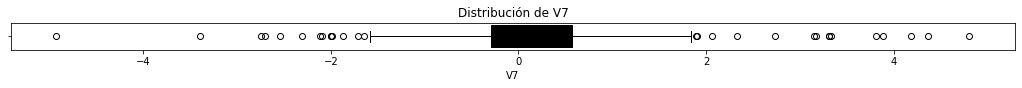

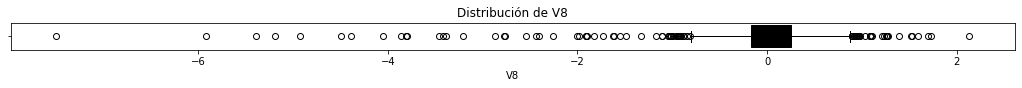

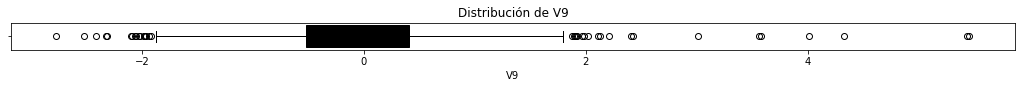

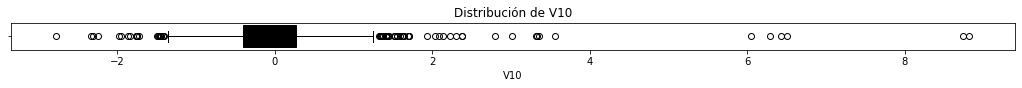

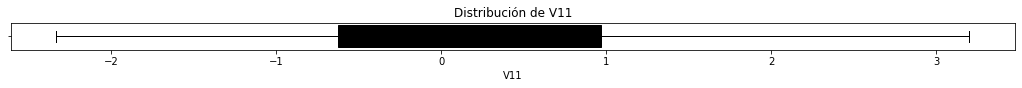

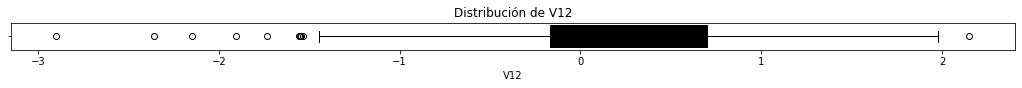

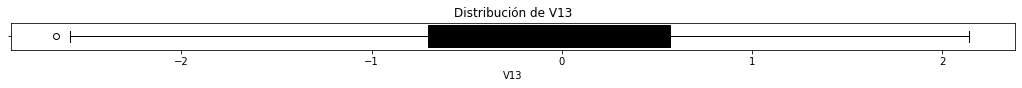

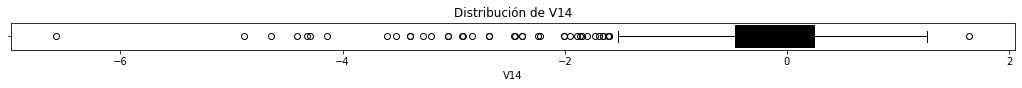

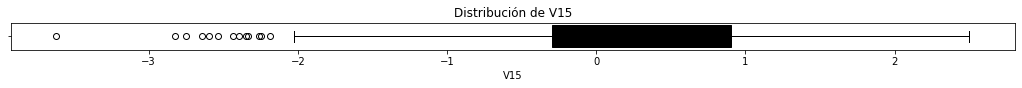

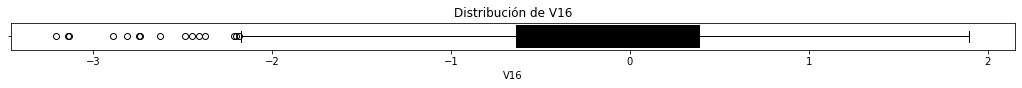

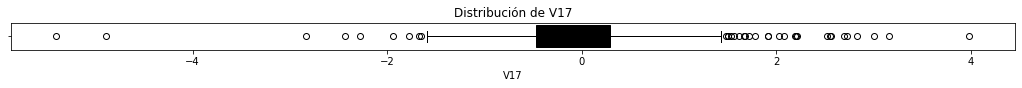

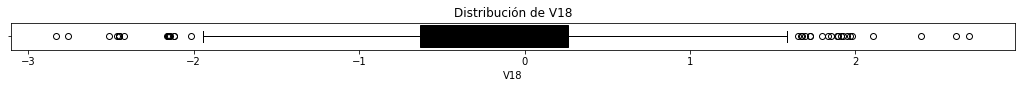

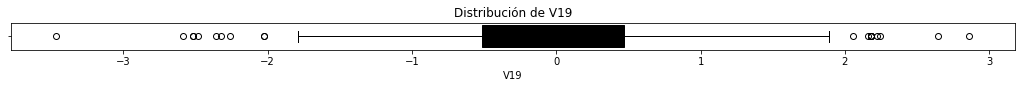

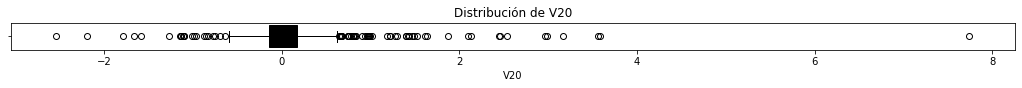

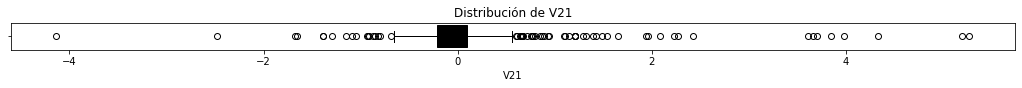

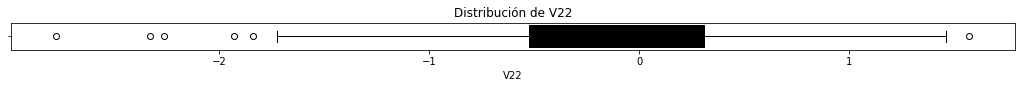

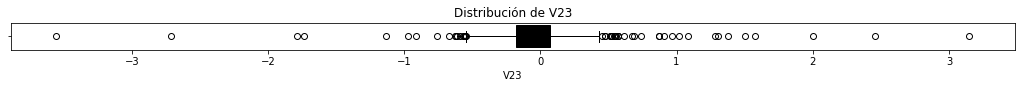

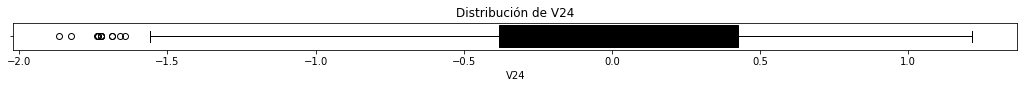

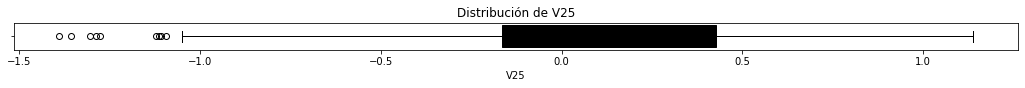

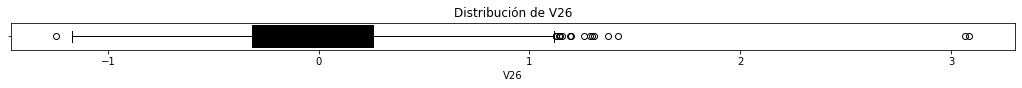

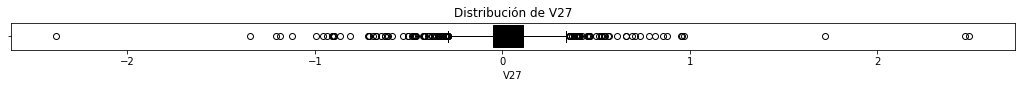

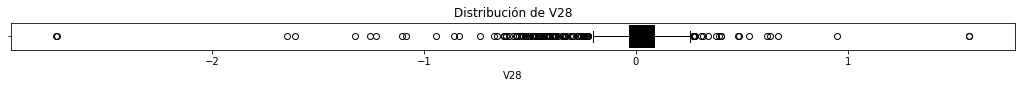

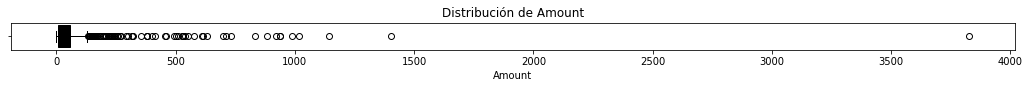

In [11]:
for col in ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']:
    plt.figure(figsize=(18, 0.5))
    sns.boxplot(x=df[col], color="black")
    plt.title(f"Distribución de {col}")
    plt.show()

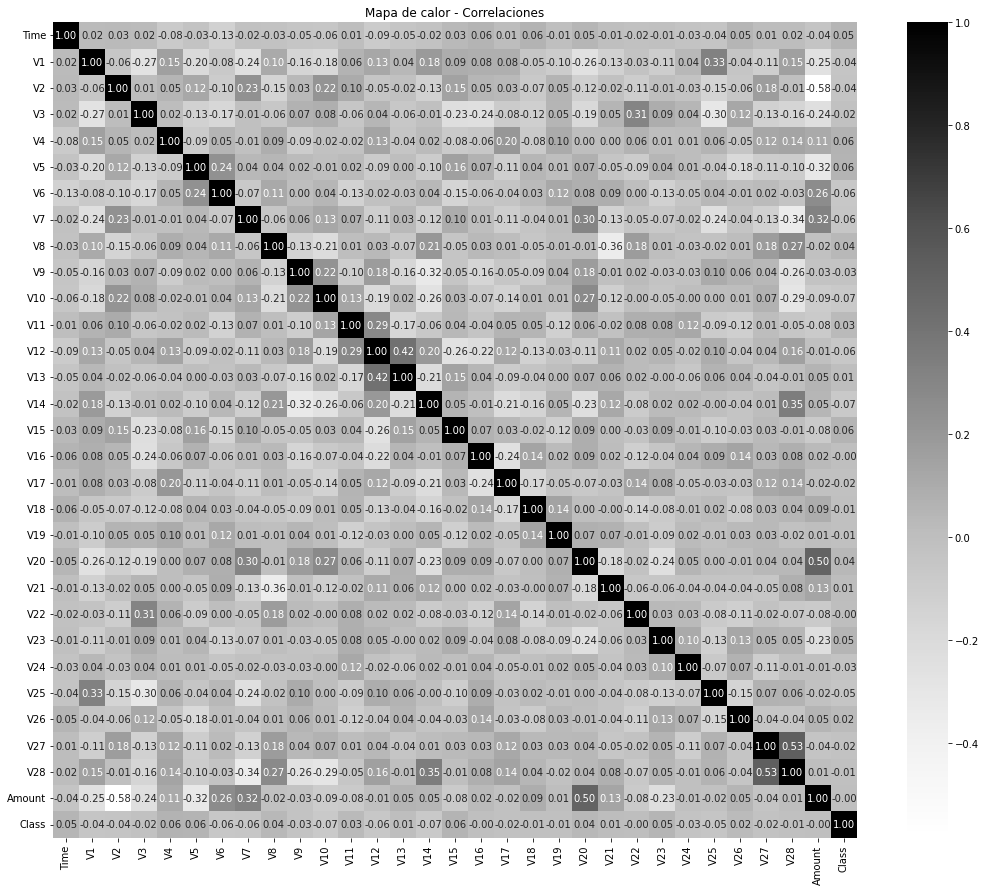

In [12]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Greys')
plt.title('Mapa de calor - Correlaciones')
plt.show()

In [13]:
K = 7 # Definimos cuantas columnas me va a seleccionar como las mas correlacionadas.

cols = corr_matrix.nlargest(K, "Time")["Time"].index

cols


Index(['Time', 'V18', 'V16', 'Class', 'V26', 'V20', 'V15'], dtype='object')

In [14]:
cm = np.corrcoef(df[cols].values.T)

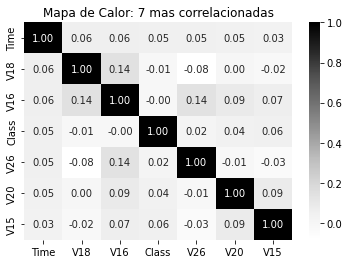

In [15]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, cmap="Greys", fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Mapa de Calor: 7 mas correlacionadas')
plt.show()

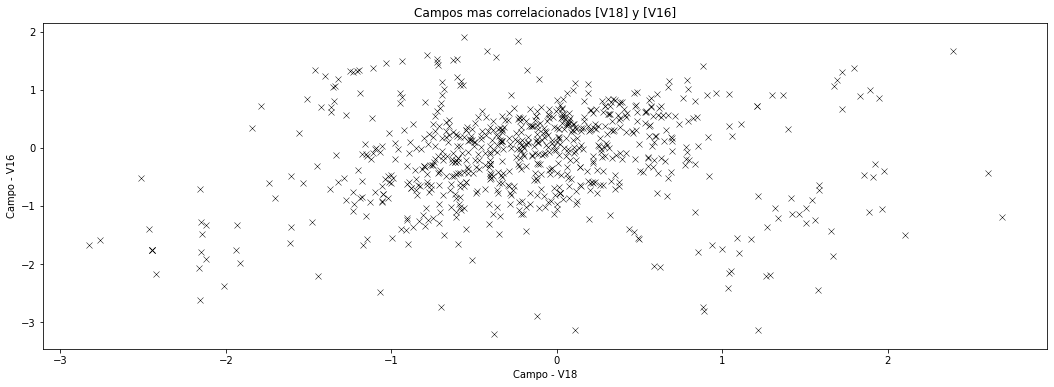

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,6))
sns.scatterplot(x=df['V18'], y=df['V16'], color='black', marker='x')
plt.title('Campos mas correlacionados [V18] y [V16]')
plt.xlabel('Campo - V18')
plt.ylabel('Campo - V16')
plt.show()

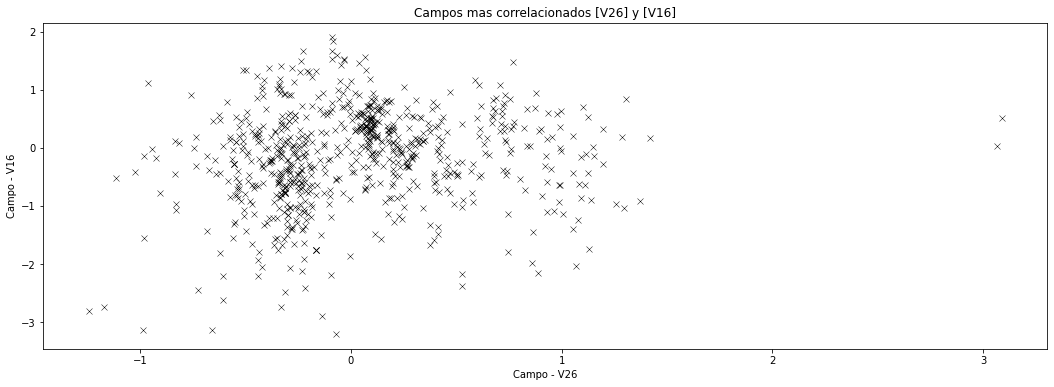

In [17]:
plt.figure(figsize=(18,6))
sns.scatterplot(x=df['V26'], y=df['V16'], color='black', marker='x')
plt.title('Campos mas correlacionados [V26] y [V16]')
plt.xlabel('Campo - V26')
plt.ylabel('Campo - V16')
plt.show()

## <div style = 'background-color:Black'> <center><font color='white'>③ Modelado y evaluación </font></div><a id="2"></a>

## ❑ Random Forest (Bosques Aleatorios)

In [18]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Class"] # Aca le pido que Y sea mi objetivo a predecir
X = data.drop(["Class"], axis=1) # Aplico que X sean todas las columnas menos la del objetivo.
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [20]:
model = RandomForestClassifier(random_state=10, 
                               n_estimators=200,
                               class_weight={0:1, 1:50},  # para darle 50 veces más peso a la clase fraude
                               max_features="log2") 
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.984313725490196


Listado de hiperparametros:

n_estimators | Cantidad de árboles en el bosque (en este caso aumentarlo no tiene sentido puesto que no mejoro el resultado.
max_depth | Profundidad máxima de cada árbol.
min_samples_split | Mínimo de muestras necesarias para dividir un nodo (no obtuve mejor resultado usándolo).
min_samples_leaf | Mínimo de muestras en una hoja (empeora los resultados en este caso).
max_features | Número de variables a considerar en cada división
bootstrap | Si usar o no muestreo con reemplazo (no lo incluyo porque empeora los resultados).
criterion | Puede ser "gini" (por defecto) o "entropy" tampoco mejora el rendimiento.
class_weight | Peso de las clases.

In [21]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [22]:
predictions=classifier.predict(X_test)

In [23]:
# Bajar el umbral de decision del modelo.
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_adj = (y_prob >= 0.2).astype(int)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_adj))
print("Accuracy:",accuracy_score(y_test, y_pred_adj))

print("Matriz de confusión")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       251
           1       0.00      0.00      0.00         4

    accuracy                           0.98       255
   macro avg       0.49      0.50      0.50       255
weighted avg       0.97      0.98      0.98       255

Accuracy: 0.984313725490196
Matriz de confusión
[[251   0]
 [  4   0]]


c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [25]:
# Tambien hago undersampling a la clase mayoritaria para reducir valores normales y que la proporcion de desbalanceo sea menor.
from imblearn.under_sampling import RandomUnderSampler

In [26]:
under = RandomUnderSampler(random_state=42)

In [27]:
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [28]:
from imblearn.under_sampling import RandomUnderSampler

# Calcular número de ejemplos minoritarios
n_minority = y_train.value_counts()[1]

# Queremos ratio 3:1 → mayoritaria = 3 * minoritaria
target_ratio = 10
n_majority_new = n_minority * target_ratio

# Definir sampler con sampling_strategy
under = RandomUnderSampler(
    sampling_strategy={0: n_majority_new, 1: n_minority}, 
    random_state=42
)

X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Revisar distribución
print(y_train_under.value_counts())


Class
0    50
1     5
Name: count, dtype: int64


In [29]:
# Ver distribución antes y después
print("Distribución original:")
print(y_train.value_counts())
print("\nDistribución después de undersampling:")
print(pd.Series(y_train_under).value_counts())

Distribución original:
Class
0    512
1      5
Name: count, dtype: int64

Distribución después de undersampling:
Class
0    50
1     5
Name: count, dtype: int64


In [30]:
model = RandomForestClassifier(random_state=10, 
                               n_estimators=200,
                               class_weight='balanced',  # para darle 50 veces más peso a la clase fraude
                               max_features="log2") 
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_train_under, y_train_under)}") # Con los datos balanceados con SMOTE

La precisión del Random Forest es: 1.0
